In [1]:
# T.C. Marmara Üniversitesi
# Teknoloji Fakültesi | Bilgisayar Mühendisliği
# Zeki ÇIPLAK | 523622981

import numpy as np
import pandas as pd

# Mail mesajları ve o mesajların spam olup-olmadığını belirten 
# etiketlerin olduğu verisetini yüklüyoruz.
df = pd.read_csv("dataset.csv")

In [2]:
# Veri setine ilk bakış...
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Veri setinde eksik değer olup-olmadığını kontrol ediyoruz.
df.isna().sum()

Category    0
Message     0
dtype: int64

In [4]:
# Spam ve Spam olmayan (Ham) kaç mesaj var?
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
# Spam ve Spam olmayan mesajların sayısının eşit olması, 
# yapılan çalışmanın doğruluğu açısından önemli..
spam = df[df['Category'] == 'spam']
spamdegil = df[df['Category'] == 'ham']
spamdegil = spamdegil.sample(spam.shape[0])

# Artık spam ve spam olmayan mesajların sayısı eşitlendi.
spamdegil.shape, spam.shape

((747, 2), (747, 2))

In [6]:
# Yukarıda ayrı ayrı olan verileri tek bir dataframe'de birleştirelim.
# Eski dataframe'lerin sahip oldukları index numaralarını görmezden geliyoruz.
# Yeni oluşan dataframe'in kendine özel olarak, otomatik index numaraları oluşuyor.
data = pd.concat([spam, spamdegil], ignore_index = True)
data.head()

,Category,Message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [7]:
# Şimdi NLTK, doğal dil işleme kütüphanesine geçelim.
import nltk
import re
nltk.download('stopwords')
##########################
# Bu kısımdakiler, 
# çıkan error mesajlarından sonra eklendiler.
nltk.download('wordnet')
nltk.download('omw-1.4')
##########################

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer # kelime köküne indirme kütüphanesi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zeki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zeki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Zeki\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
# One hot encoding ile spam ve spam olmayan kategorileri sayısal değerlere dönüştürelim.
# Makine öğrenmesi algoritmaları, sayısal olmayan verilerle çalışamazlar.
# spam=1, spamdegil=0
from sklearn.preprocessing import LabelEncoder
data['Category']=LabelEncoder().fit_transform(data['Category'])

data.head()

,Category,Message
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,1,FreeMsg Hey there darling it's been 3 week's n...
2,1,WINNER!! As a valued network customer you have...
3,1,Had your mobile 11 months or more? U R entitle...
4,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [9]:
corpus=[]
datalen = len(data)
wordnet=WordNetLemmatizer()

for i in range(0,datalen):
    # mesajlardaki linklerin kaldırılması
    review = re.sub(r'https?://\S+|www.\S+', '', data["Message"][i])
    # mesajlardaki < ve > şeklinde html tarzı kodların kaldırılması
    review = review.replace('<', '')
    review = review.replace('>', '')
    # a-z ve A-Z arasındaki harflerin dışındaki harflerin " " ile değiştirilmesi
    review = re.sub(r'[^a-zA-Z]+', ' ', review)
    # Tüm sayısal ifadelerin tamamen kaldırılması
    review = re.sub(r'[0-9]', '', review)
    # Tüm karakterlerin küçük harfe çevrilmesi
    review = review.lower()
    # Mesajın boşluk karakterine (" ") parçalanması ve dizi haline getirilmesi
    review = review.split()
    # Dizi içerisinde mesajın parçalanmış kelimeleri var.
    # Her birinin öncelikle stopwords'ta olup olmadığına bakılıyor.
    # Ardından, her bir kelime lematizasyona tabi tutuluyor.
    review = [str(wordnet.lemmatize(word)) for word in review if not word in stopwords.words('english')]
    # Parça parça olan kelimeler, boşluk karakteri ile yeniden birleştiriliyor.
    review = ' '.join(review)
    # Temizlenen mesaj, tüm temizlenmiş mesajların bulunduğu listenin içine ekleniyor.
    corpus.append(review)

In [10]:
# Önişlemeden geçirilmiş tüm mesajlar
corpus

['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c lccltd pobox ldnw rw',
 'xxxmobilemovieclub use credit click wap link next txt message click xxxmobilemovieclub com n qjkgighjjgcbl',
 'england v macedonia dont miss goal team news txt ur national team eg england try wale scotland txt poboxox w wq',
 'thanks subscription ringtone uk mobile charged month please confirm replying yes reply charged',
 'rodger burn msg tried call reply sm free nokia mobile free camcorder please call delivery tomorrow',
 'sm ac sptv n

In [11]:
# Bağımlı ve bağımsız değişken değerleri oluşturuluyor.
y=data["Category"] # bağımlı hedef değişken
X=pd.DataFrame(corpus,columns=['text']) # bağımsız değişken


In [12]:
X

,text
0,free entry wkly comp win fa cup final tkts st ...
1,freemsg hey darling week word back like fun st...
2,winner valued network customer selected receiv...
3,mobile month u r entitled update latest colour...
4,six chance win cash pound txt csh send cost p ...
...,...
1489,found enc lt gt
1490,k k month kotees birthday know
1491,im good thinking
1492,yeah got one lined u


In [13]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1489    0
1490    0
1491    0
1492    0
1493    0
Name: Category, Length: 1494, dtype: int32

In [14]:
# Tüm veriyi eğitim-test verisi olarak ikiye ayırıyoruz.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# Bir mesajda hangi kelimeden kaç adet olduğunu gösteren kelime vekörünü oluşturuyoruz.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000) # maksimum 3000 elemanlı bir vektör oluşturulacak.

train_X = cv.fit_transform(X_train['text']).toarray()
test_X  = cv.transform(X_test['text']).toarray()

In [16]:
print("Test ve Eğitim verilerinin boyutları: ")
print(train_X.shape)
print(test_X.shape)
print(y_train.shape)
print(y_test.shape)

Test ve Eğitim verilerinin boyutları: 
(1195, 2995)
(299, 2995)
(1195,)
(299,)


In [17]:
# test_X ve train_X birer matristir.
# her biri, her kelimeden, hangi mesajda, kaç tane olduğunu gösterir.
# satırlar mesaj sayısıdır. sütunlar kelime sayısıdır.
# her kelime bir numara ile numaralandırılmıştır.

ornek = pd.DataFrame(test_X)
ornek

,0,1,2,3,4,5,6,7,8,9,...,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Şimdi makine öğrenmesi algoritmalarına geçelim.
# 1) RandomForest, 2) SVM, 3) Naive Bayes (GaussianNB ve MultinomialNB)

In [19]:
####################
# 1) RANDOM FOREST
####################
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0).fit(train_X,y_train)
y_pred_rfc=rfc.predict(test_X)

# Accuracy (Doğruluk) hesabı
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Random Forest | Doğruluk Oranı (Accuracy): %", (accuracy_score(y_test,y_pred_rfc) * 100), sep="")

Random Forest | Doğruluk Oranı (Accuracy): %94.64882943143813


[[150   4]
 [ 12 133]]


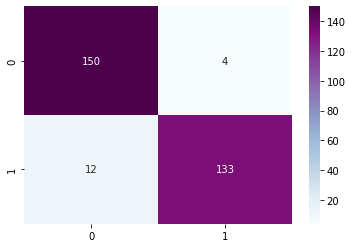

In [20]:
# Sadece doğruluk oranına bakmak, modelin doğruluğunu anlamamıza yetmez.
# Karmaşıklık matrisini de incelemek gerekir.

import matplotlib.pyplot as plt
import seaborn as sns

# Karmaşıklık Matrisinin oluşturulması
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, cmap='BuPu', annot=True,fmt='d')
print(cm)

In [21]:
# Precision, Recall ve F1-Score Hesaplamaları
from sklearn.metrics import precision_score, recall_score, f1_score

print("----RANDOM FOREST----")
print("Precision (macro): ", precision_score(y_test, y_pred_rfc, average='macro'))
print("Recall (macro): ", recall_score(y_test, y_pred_rfc, average='macro'))
print("F1 Score (macro): ", f1_score(y_test, y_pred_rfc, average='macro'))
print("----------------")
print("Precision (micro): ", precision_score(y_test, y_pred_rfc, average='micro'))
print("Recall (micro): ", recall_score(y_test, y_pred_rfc, average='micro'))
print("F1 Score (micro): ", f1_score(y_test, y_pred_rfc, average='micro'))
print("----------------")
print("Precision (weighted): ", precision_score(y_test, y_pred_rfc, average='weighted'))
print("Recall (weighted): ", recall_score(y_test, y_pred_rfc, average='weighted'))
print("F1 Score (weighted): ", f1_score(y_test, y_pred_rfc, average='weighted'))
print("----------------")
print("RandomForest, En iyi sonuçları vermiştir.")

----RANDOM FOREST----
Precision (macro):  0.9483644228169776
Recall (macro):  0.9456336766681595
F1 Score (macro):  0.9463147499775564
----------------
Precision (micro):  0.9464882943143813
Recall (micro):  0.9464882943143813
F1 Score (micro):  0.9464882943143813
----------------
Precision (weighted):  0.9476890165560429
Recall (weighted):  0.9464882943143813
F1 Score (weighted):  0.9464066263911695
----------------
RandomForest, En iyi sonuçları vermiştir.


In [22]:
###################################
# 2) SVM (Support Vector Machines)
###################################
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(train_X,y_train)
y_pred_svm=classifier.predict(test_X)

In [23]:
# Accuracy (Doğruluk) hesabı
print("SVM | Doğruluk Oranı (Accuracy): %", (accuracy_score(y_test,y_pred_svm) * 100), sep="")

SVM | Doğruluk Oranı (Accuracy): %94.31438127090301


[[148   6]
 [ 11 134]]


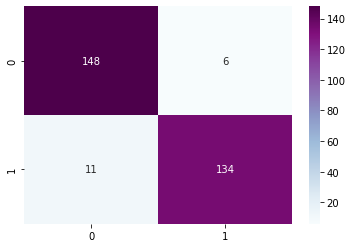

In [24]:
# Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, cmap='BuPu', annot=True,fmt='d')
print(cm)

In [25]:
print("----SVM----")
print("Precision (macro): ", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall (macro): ", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score (macro): ", f1_score(y_test, y_pred_svm, average='macro'))
print("----------------")
print("Precision (micro): ", precision_score(y_test, y_pred_svm, average='micro'))
print("Recall (micro): ", recall_score(y_test, y_pred_svm, average='micro'))
print("F1 Score (micro): ", f1_score(y_test, y_pred_svm, average='micro'))
print("----------------")
print("Precision (weighted): ", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall (weighted): ", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score (weighted): ", f1_score(y_test, y_pred_svm, average='weighted'))
print("----------------")
print("SVM: Tüm sonuçlar, gayet başarılı")

----SVM----
Precision (macro):  0.9439802336028751
Recall (macro):  0.9425884460367219
F1 Score (macro):  0.9430188890757245
----------------
Precision (micro):  0.9431438127090301
Recall (micro):  0.9431438127090301
F1 Score (micro):  0.9431438127090301
----------------
Precision (weighted):  0.9435840342321065
Recall (weighted):  0.9431438127090301
F1 Score (weighted):  0.9430991971257068
----------------
SVM: Tüm sonuçlar, gayet başarılı


In [26]:
###################################
# 3) NAIVE BAYES SINIFLANDIRMALAR
###################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X,y_train)
y_pred_gnb=gnb.predict(test_X)

mnb = MultinomialNB()
mnb.fit(train_X,y_train)
y_pred_mnb=mnb.predict(test_X)

In [27]:
# Accuracy 
print("GaussianNB | Doğruluk Oranı (Accuracy): %", (accuracy_score(y_test,y_pred_gnb) * 100), sep="")
print("MultinomialNB | Doğruluk Oranı (Accuracy): %", (accuracy_score(y_test,y_pred_mnb) * 100), sep="")

GaussianNB | Doğruluk Oranı (Accuracy): %80.60200668896321
MultinomialNB | Doğruluk Oranı (Accuracy): %93.64548494983278


[[101  53]
 [  5 140]]


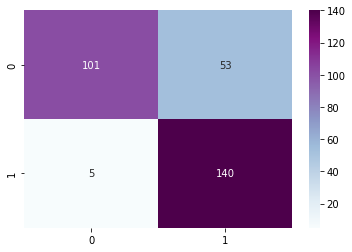

In [28]:
# Karmaşıklık Matrisi GaussianNB
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, cmap='BuPu', annot=True, fmt='d')
print(cm)

[[140  14]
 [  5 140]]


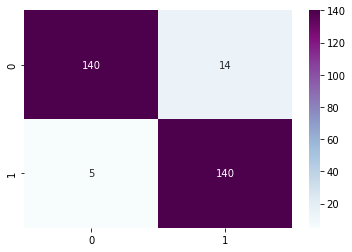

In [29]:
# Karmaşıklık Matrisi MultinomialNB
cm = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm, cmap='BuPu', annot=True, fmt='d')
print(cm)

In [30]:
print("----GaussianNB----")
print("Precision (macro): ", precision_score(y_test, y_pred_gnb, average='macro'))
print("Recall (macro): ", recall_score(y_test, y_pred_gnb, average='macro'))
print("F1 Score (macro): ", f1_score(y_test, y_pred_gnb, average='macro'))
print("----------------")
print("Precision (micro): ", precision_score(y_test, y_pred_gnb, average='micro'))
print("Recall (micro): ", recall_score(y_test, y_pred_gnb, average='micro'))
print("F1 Score (micro): ", f1_score(y_test, y_pred_gnb, average='micro'))
print("----------------")
print("Precision (weighted): ", precision_score(y_test, y_pred_gnb, average='weighted'))
print("Recall (weighted): ", recall_score(y_test, y_pred_gnb, average='weighted'))
print("F1 Score (weighted): ", f1_score(y_test, y_pred_gnb, average='weighted'))
print("----------------")
print("GaussianNB: En kötü sonuçlar!")

----GaussianNB----
Precision (macro):  0.8391093948577574
Recall (macro):  0.8106806986117332
F1 Score (macro):  0.8026627218934912
----------------
Precision (micro):  0.8060200668896321
Recall (micro):  0.8060200668896321
F1 Score (micro):  0.8060200668896321
----------------
Precision (weighted):  0.8425324287854945
Recall (weighted):  0.8060200668896321
F1 Score (weighted):  0.8018879499713049
----------------
GaussianNB: En kötü sonuçlar!


In [31]:
print("----MultinomialNB----")
print("Precision (macro): ", precision_score(y_test, y_pred_mnb, average='macro'))
print("Recall (macro): ", recall_score(y_test, y_pred_mnb, average='macro'))
print("F1 Score (macro): ", f1_score(y_test, y_pred_mnb, average='macro'))
print("----------------")
print("Precision (micro): ", precision_score(y_test, y_pred_mnb, average='micro'))
print("Recall (micro): ", recall_score(y_test, y_pred_mnb, average='micro'))
print("F1 Score (micro): ", f1_score(y_test, y_pred_mnb, average='micro'))
print("----------------")
print("Precision (weighted): ", precision_score(y_test, y_pred_mnb, average='weighted'))
print("Recall (weighted): ", recall_score(y_test, y_pred_mnb, average='weighted'))
print("F1 Score (weighted): ", f1_score(y_test, y_pred_mnb, average='weighted'))
print("----------------")
print("MultinomialNB: Sonuçlar gayet başarılı!")

----MultinomialNB----
Precision (macro):  0.9373040752351097
Recall (macro):  0.9373040752351097
F1 Score (macro):  0.9364548494983278
----------------
Precision (micro):  0.9364548494983278
Recall (micro):  0.9364548494983278
F1 Score (micro):  0.9364548494983278
----------------
Precision (weighted):  0.9381533009718916
Recall (weighted):  0.9364548494983278
F1 Score (weighted):  0.9364548494983278
----------------
MultinomialNB: Sonuçlar gayet başarılı!


In [32]:
# En iyi sonucu veren algoritma RandomForest olmuştur.
# En kötü sonucu da GaussianNB vermiştir.
print("Zeki ÇIPLAK")

Zeki ÇIPLAK
